# Embedding QC 2023-12-15

**The QC entails the following**

1. Inspection of embedding metadata:
   2. Check all info is correct
   3. Checl all links and DOIs are valid
   4. Check embeddings are in the right place
4. Inspection of embedding data -- plot umaps of medium size slices of Census. 

In [1]:
import json
import pprint
import warnings

import cellxgene_census
import scanpy
from cellxgene_census.experimental import get_embedding, get_embedding_metadata

warnings.filterwarnings("ignore")
import collections

import numpy as np

## Metadata inspection 

In [2]:
emb_uris_human = {
    "scgpt": "s3://cellxgene-contrib-public/contrib/cell-census/soma/2023-12-15/CxG-contrib-1/",
    "uce": "s3://cellxgene-contrib-public/contrib/cell-census/soma/2023-12-15/CxG-contrib-2/",
    "nmf": "s3://cellxgene-contrib-public/contrib/cell-census/soma/2023-12-15/CxG-contrib-4",
}

emb_uris_mouse = {
    "uce": "s3://cellxgene-contrib-public/contrib/cell-census/soma/2023-12-15/CxG-contrib-3/",
}

maintained_embs_human = ["scvi", "geneformer"]
maintained_embs_mouse = ["scvi"]
census_version = "2023-12-15"

### Human

In [3]:
for emb in emb_uris_human:
    pprint.pprint(emb)
    pprint.pprint(get_embedding_metadata(emb_uris_human[emb]))
    print()

'scgpt'
{'DOI': '10.1101/2023.04.30.538439',
 'additional_contacts': [],
 'additional_information': '',
 'census_version': '2023-12-15',
 'data_type': 'obs_embedding',
 'description': 'Utilizing the burgeoning single-cell sequencing data, we have '
                'pioneered the construction of a foundation model for '
                'single-cell biology, scGPT, which is based on generative '
                'pre-trained transformer across a repository of over 33 '
                'million cells. Our findings illustrate that scGPT, a '
                'generative pre-trained transformer, effectively distills '
                'critical biological insights concerning genes and cells. '
                'Through the further adaptation of transfer learning, scGPT '
                'can be optimized to achieve superior performance across '
                'diverse downstream applications.',
 'experiment_name': 'homo_sapiens',
 'id': 'CxG-contrib-1',
 'measurement_name': 'RNA',
 'model_link

### Mouse

In [4]:
for emb in emb_uris_mouse:
    pprint.pprint(emb)
    pprint.pprint(get_embedding_metadata(emb_uris_mouse[emb]))
    print()

'uce'
{'DOI': '10.1101/2023.11.28.568918',
 'additional_contacts': [],
 'additional_information': '',
 'census_version': '2023-12-15',
 'data_type': 'obs_embedding',
 'description': 'The Universal Cell Embedding model is a true foundation model '
                'for single cell biology. It can represent any cell, from any '
                'species, tissue or disease state in the same fixed embedding '
                'space, with no model retraining or fine-tuning (zero-shot). '
                'The UCE model is composed of 33 transformer layers and more '
                'than 650 million parameters. UCE was trained in a self '
                'supervised manner, so cell organization (e.g. into cell '
                'types) is an emergent behavior of the model, rather than of '
                'pre-existing human defined cell types.',
 'experiment_name': 'mus_musculus',
 'id': 'CxG-contrib-3',
 'measurement_name': 'RNA',
 'model_link': 'https://github.com/snap-stanford/UCE',
 'n_em

In [5]:
emb_names = ["scvi", "geneformer"]
census = cellxgene_census.open_soma(census_version=census_version)

In [6]:
for emb in maintained_embs_human:
    print(emb)
    meta = census["census_data"]["homo_sapiens"].ms["RNA"].obsm[emb].metadata["CxG_embedding_info"]
    pprint.pprint(json.loads(meta))

scvi
{'DOI': '10.1038/s41592-018-0229-2',
 'additional_contacts': [{'affiliation': 'Weizmann Institute of Science, '
                                         'Israel',
                          'email': 'nir.yosef@weizmann.ac.il',
                          'name': 'Nir Yosef'},
                         {'affiliation': 'UC Berkeley',
                          'email': 'cergen@berkeley.edu',
                          'name': 'Can Ergen'},
                         {'affiliation': 'UC Berkeley',
                          'email': 'martinkim@berkeley.edu',
                          'name': 'Martin Kim'}],
 'additional_information': 'scVI was trained on primary cells from Census with '
                           'at least 300 expressed genes, and on the top 8000 '
                           'highly variable genes with the Census method '
                           "highly_variable_genes, which implements ScanPy's "
                           'Seurat flavor to be used on count data while '
  

In [7]:
for emb in maintained_embs_mouse:
    print(emb)
    meta = census["census_data"]["mus_musculus"].ms["RNA"].obsm[emb].metadata["CxG_embedding_info"]
    pprint.pprint(json.loads(meta))

scvi
{'DOI': '10.1038/s41592-018-0229-2',
 'additional_contacts': [{'affiliation': 'Weizmann Institute of Science, '
                                         'Israel',
                          'email': 'nir.yosef@weizmann.ac.il',
                          'name': 'Nir Yosef'},
                         {'affiliation': 'UC Berkeley',
                          'email': 'cergen@berkeley.edu',
                          'name': 'Can Ergen'},
                         {'affiliation': 'UC Berkeley',
                          'email': 'martinkim@berkeley.edu',
                          'name': 'Martin Kim'}],
 'additional_information': 'scVI was trained on primary cells from Census with '
                           'at least 300 expressed genes, and on the top 8000 '
                           'highly variable genes with the Census method '
                           "highly_variable_genes, which implements ScanPy's "
                           'Seurat flavor to be used on count data while '
  

## Quick data inspection

### Human - small

In [8]:
emb_names = list(emb_uris_human.keys()) + maintained_embs_human

In [9]:
adata = cellxgene_census.get_anndata(
    census,
    organism="homo_sapiens",
    measurement_name="RNA",
    obs_value_filter="tissue_general == 'central nervous system' and is_primary_data == True",
    column_names={"obs": ["cell_type", "assay", "soma_joinid"]},
    obsm_layers=maintained_embs_human,
)

In [10]:
adata

AnnData object with n_obs × n_vars = 15963 × 60664
    obs: 'cell_type', 'assay', 'soma_joinid', 'tissue_general', 'is_primary_data'
    var: 'soma_joinid', 'feature_id', 'feature_name', 'feature_length', 'nnz', 'n_measured_obs'
    obsm: 'scvi', 'geneformer'

In [11]:
for emb in emb_uris_human:
    adata.obsm[emb] = get_embedding(
        census_version,
        emb_uris_human[emb],
        adata.obs["soma_joinid"].to_numpy(),
    )

In [12]:
adata

AnnData object with n_obs × n_vars = 15963 × 60664
    obs: 'cell_type', 'assay', 'soma_joinid', 'tissue_general', 'is_primary_data'
    var: 'soma_joinid', 'feature_id', 'feature_name', 'feature_length', 'nnz', 'n_measured_obs'
    obsm: 'scvi', 'geneformer', 'scgpt', 'uce', 'nmf'

In [13]:
for emb in emb_names:
    scanpy.pp.neighbors(adata, use_rep=emb, key_added=emb)
    scanpy.tl.umap(adata, neighbors_key=emb)
    adata.obsm["X_" + emb] = adata.obsm["X_umap"].copy()
    del adata.obsm["X_umap"]

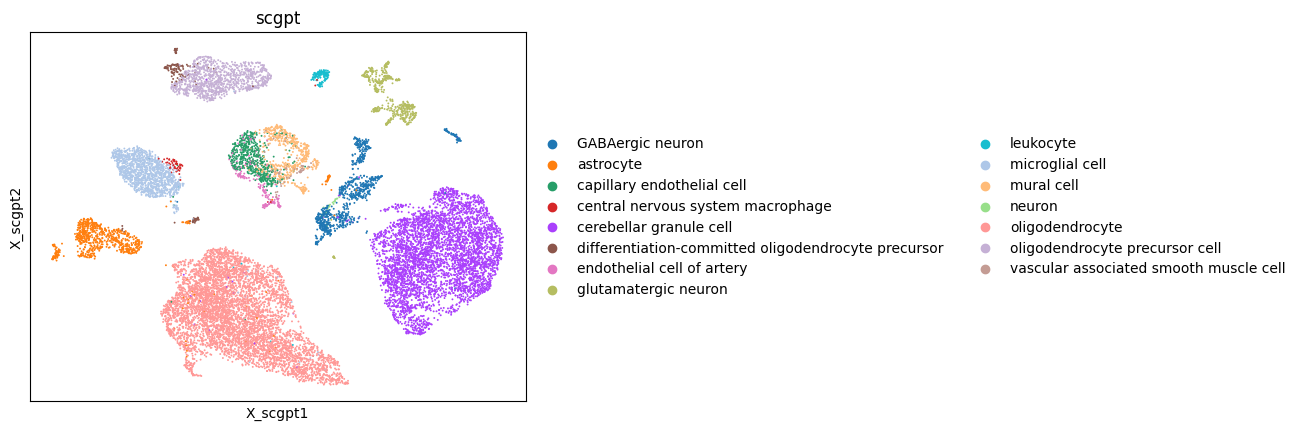

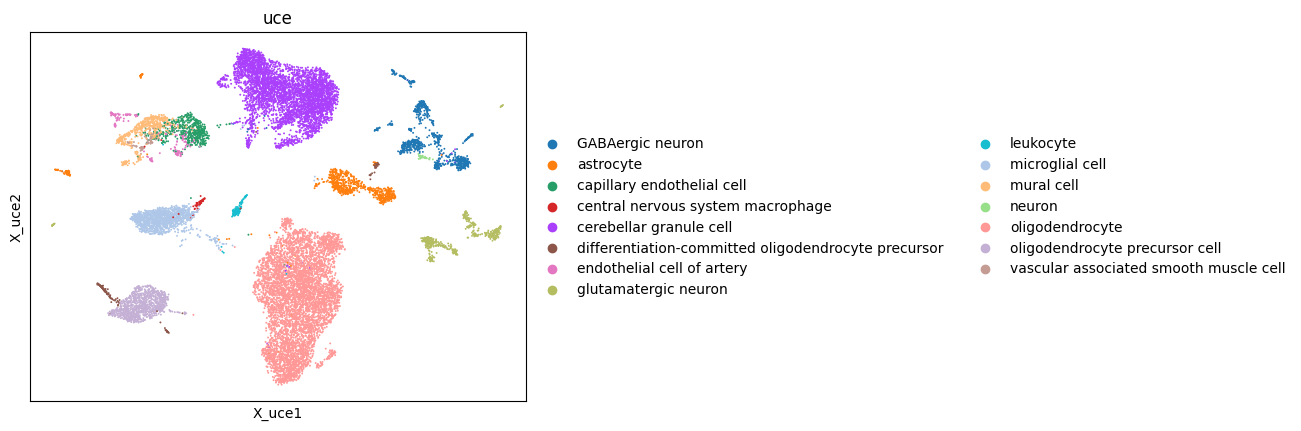

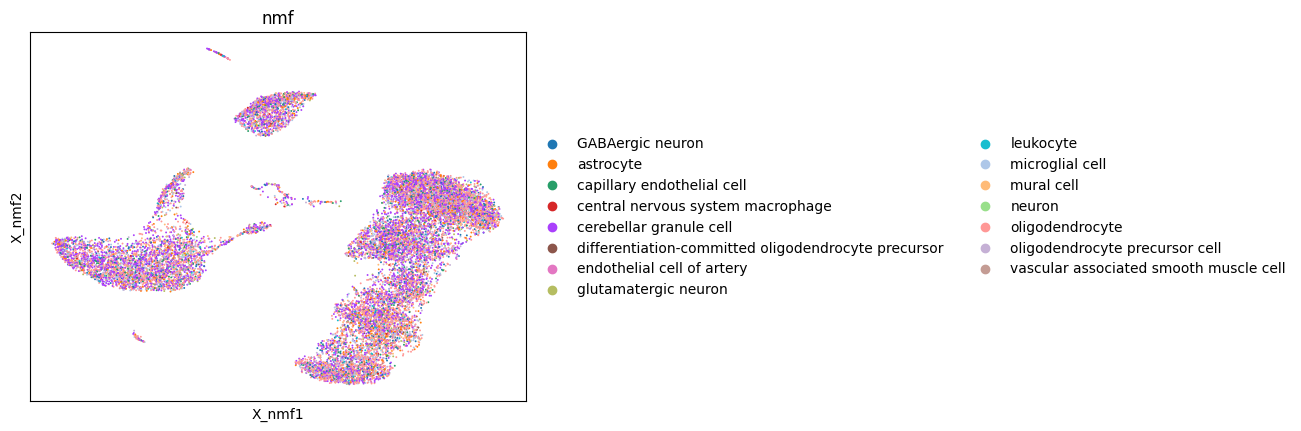

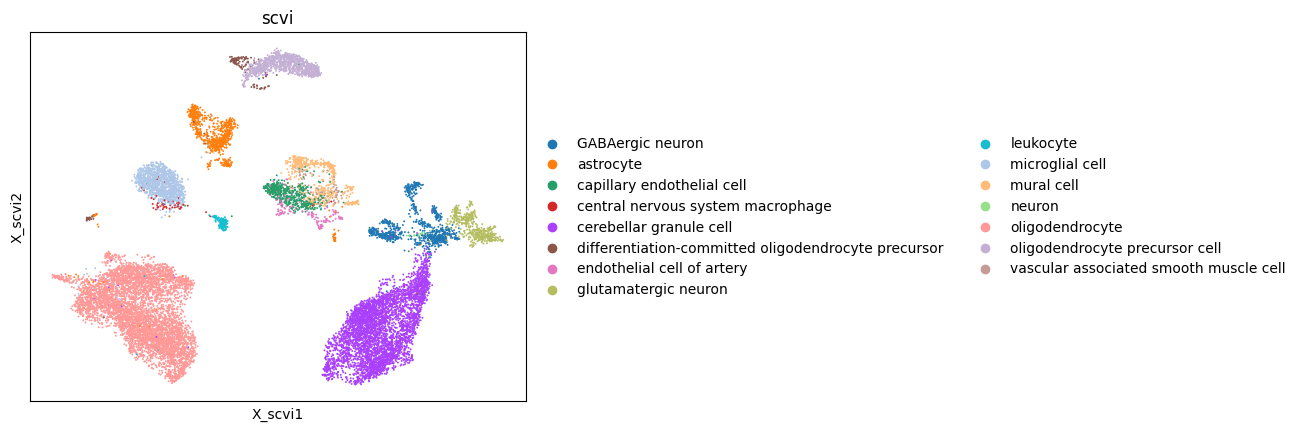

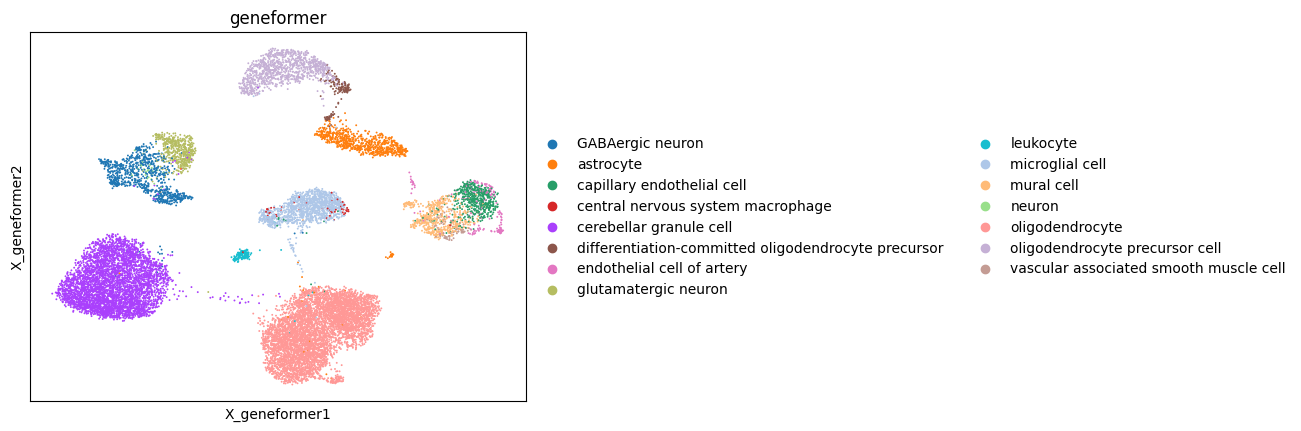

In [14]:
for emb in emb_names:
    scanpy.pl.embedding(adata, basis="X_" + emb, color="cell_type", title=emb)

### Human - large

In [15]:
emb_names = list(emb_uris_human.keys()) + maintained_embs_human
emb_names.remove("nmf")

In [16]:
adata = cellxgene_census.get_anndata(
    census,
    organism="homo_sapiens",
    measurement_name="RNA",
    obs_value_filter="tissue_general == 'pancreas' and is_primary_data == True",
    column_names={"obs": ["cell_type", "assay", "soma_joinid", "dataset_id", "is_primary_data"]},
    obsm_layers=maintained_embs_human,
)

In [17]:
adata

AnnData object with n_obs × n_vars = 183742 × 60664
    obs: 'cell_type', 'assay', 'soma_joinid', 'dataset_id', 'is_primary_data', 'tissue_general'
    var: 'soma_joinid', 'feature_id', 'feature_name', 'feature_length', 'nnz', 'n_measured_obs'
    obsm: 'scvi', 'geneformer'

In [18]:
this_embs = emb_uris_human.copy()
this_embs.pop("nmf")
for emb in this_embs:
    adata.obsm[emb] = get_embedding(
        census_version,
        emb_uris_human[emb],
        adata.obs["soma_joinid"].to_numpy(),
    )

    # Exclude cells with all embeddings as NaN
    nan_row_sums = np.sum(np.isnan(adata.obsm[emb]), axis=1)
    include_rows = nan_row_sums != adata.obsm[emb].shape[1]
    adata = adata[include_rows,]

In [19]:
for emb in emb_names:
    scanpy.pp.neighbors(adata, use_rep=emb, key_added=emb)
    scanpy.tl.umap(adata, neighbors_key=emb)
    adata.obsm["X_" + emb] = adata.obsm["X_umap"].copy()
    del adata.obsm["X_umap"]

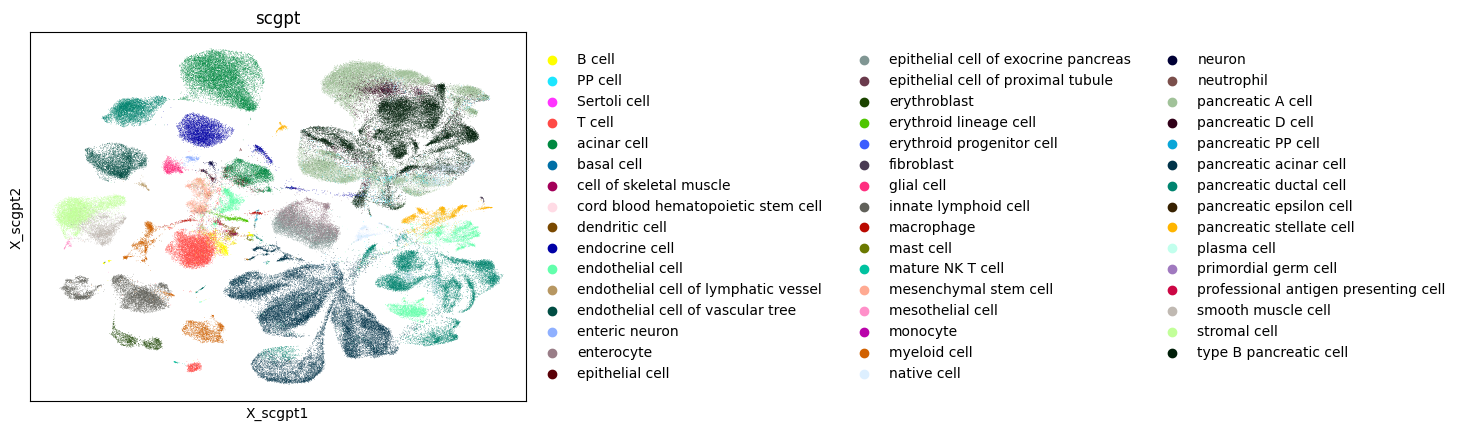

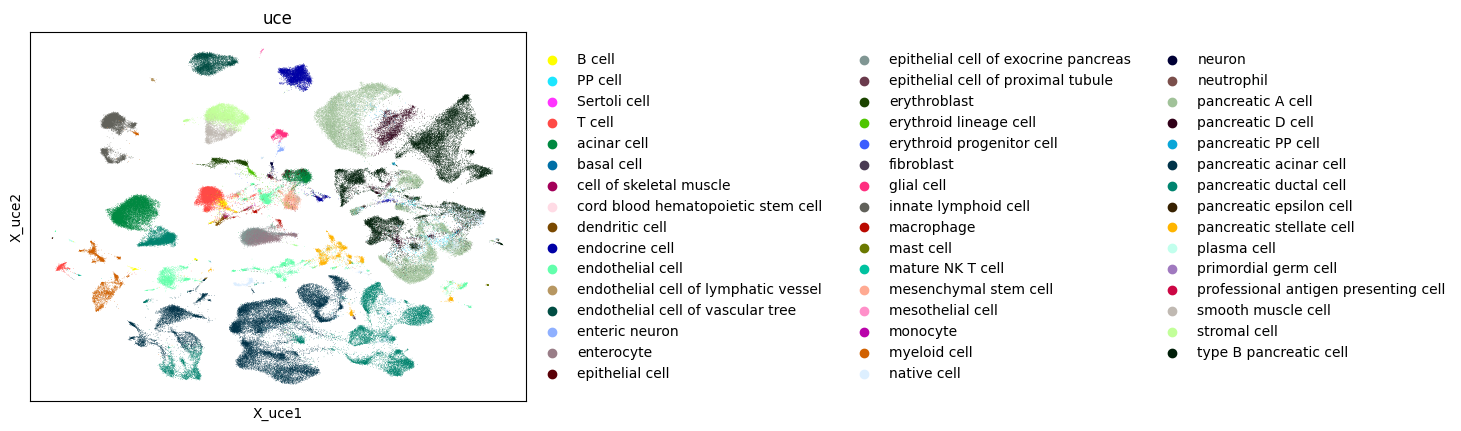

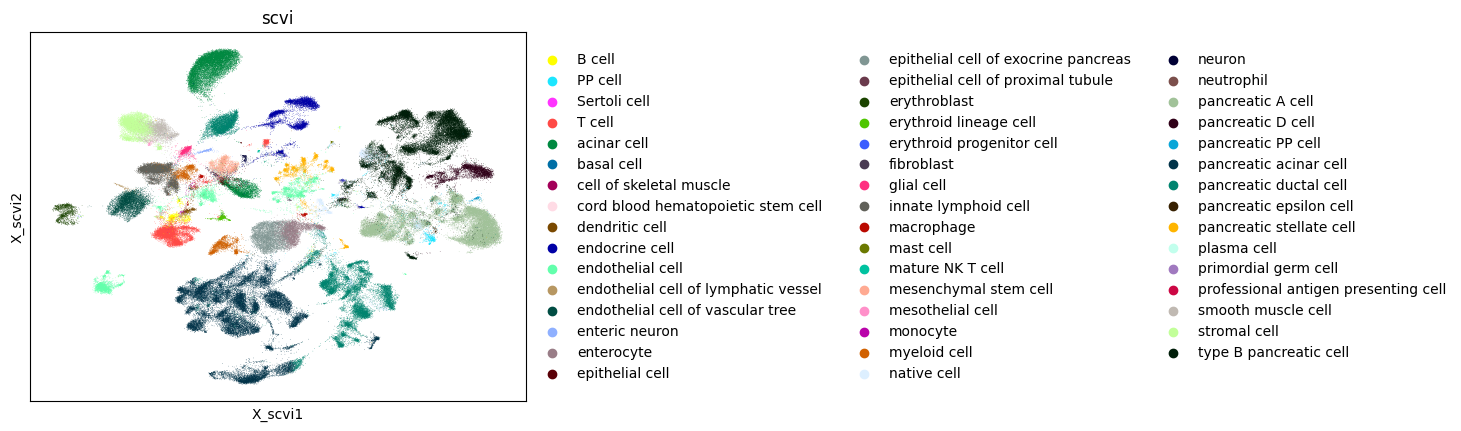

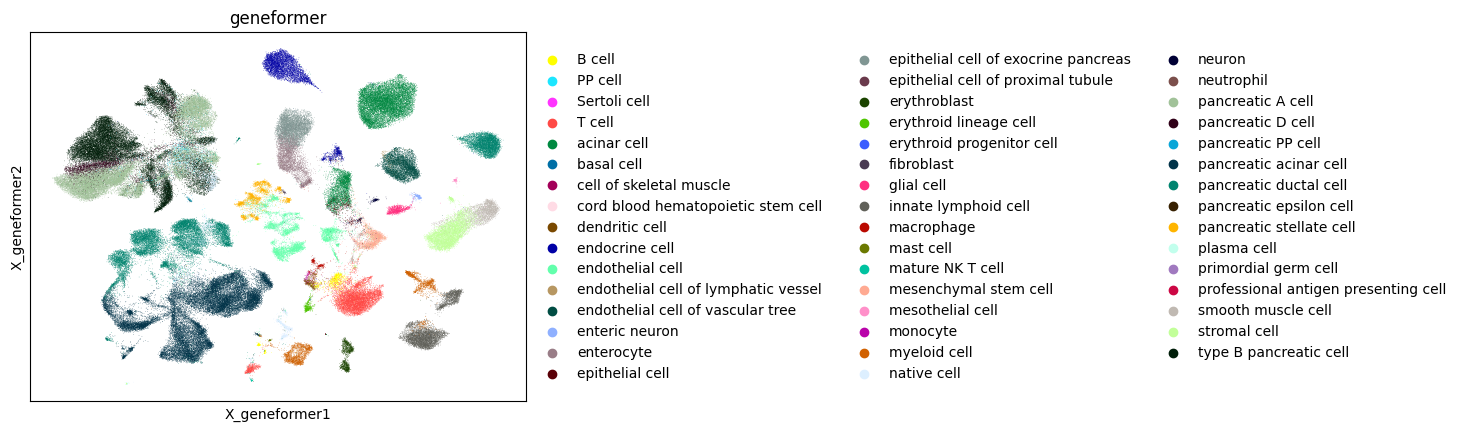

In [20]:
for emb in emb_names:
    scanpy.pl.embedding(adata, basis="X_" + emb, color="cell_type", title=emb)

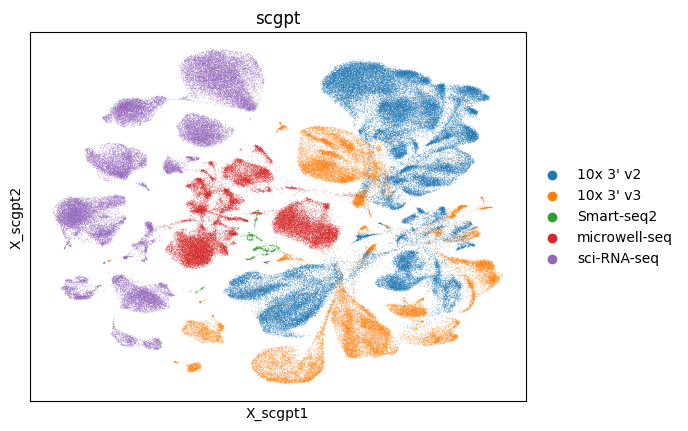

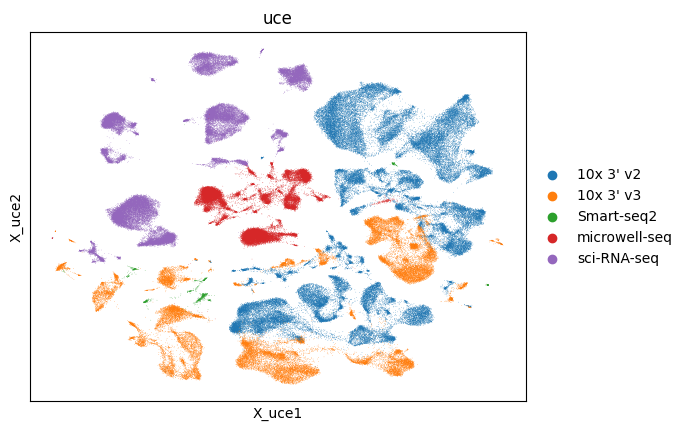

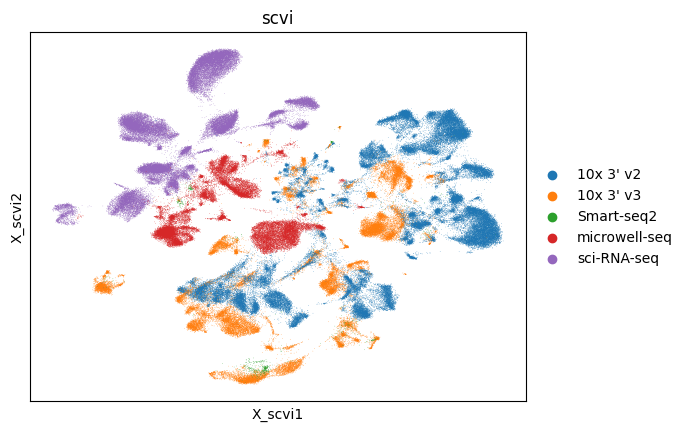

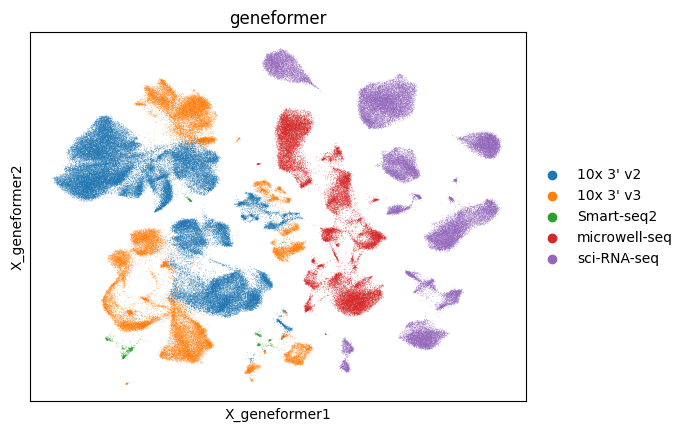

In [21]:
for emb in emb_names:
    scanpy.pl.embedding(adata, basis="X_" + emb, color="assay", title=emb)

### Mouse -- small

In [22]:
emb_names = list(emb_uris_mouse.keys()) + maintained_embs_mouse

In [23]:
adata = cellxgene_census.get_anndata(
    census,
    organism="mus_musculus",
    measurement_name="RNA",
    obs_value_filter="tissue_general == 'heart' and is_primary_data == True",
    column_names={"obs": ["cell_type", "assay", "soma_joinid"]},
    obsm_layers=maintained_embs_mouse,
)

In [24]:
adata

AnnData object with n_obs × n_vars = 18282 × 52417
    obs: 'cell_type', 'assay', 'soma_joinid', 'tissue_general', 'is_primary_data'
    var: 'soma_joinid', 'feature_id', 'feature_name', 'feature_length', 'nnz', 'n_measured_obs'
    obsm: 'scvi'

In [25]:
for emb in emb_uris_mouse:
    adata.obsm[emb] = get_embedding(
        census_version,
        emb_uris_mouse[emb],
        adata.obs["soma_joinid"].to_numpy(),
    )

In [26]:
for emb in emb_names:
    scanpy.pp.neighbors(adata, use_rep=emb, key_added=emb)
    scanpy.tl.umap(adata, neighbors_key=emb)
    adata.obsm["X_" + emb] = adata.obsm["X_umap"].copy()
    del adata.obsm["X_umap"]

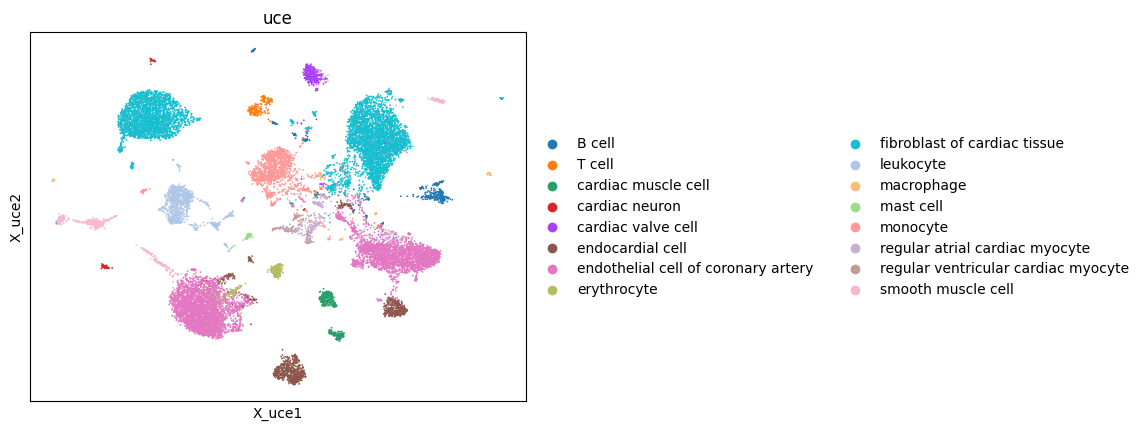

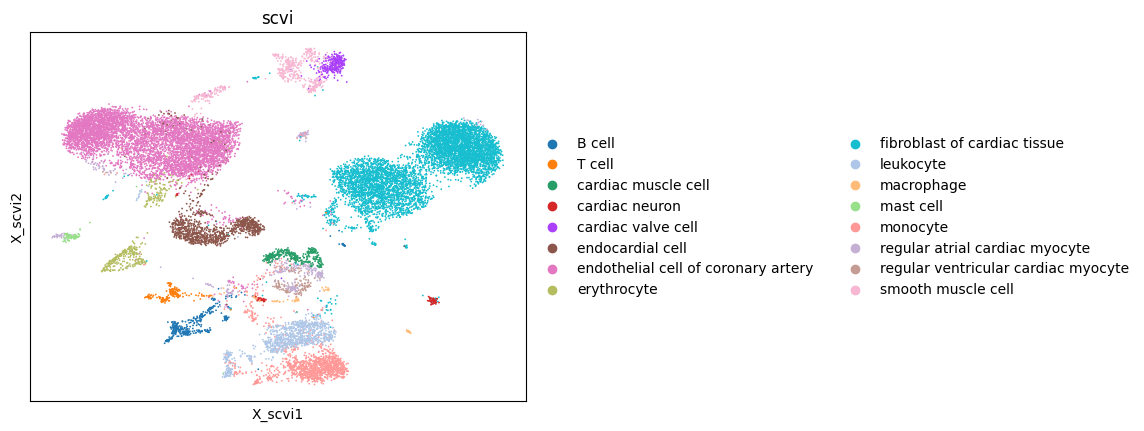

In [27]:
for emb in emb_names:
    scanpy.pl.embedding(adata, basis="X_" + emb, color="cell_type", title=emb)

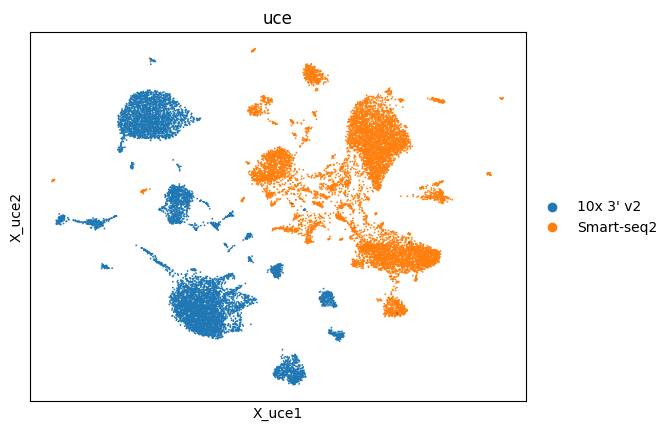

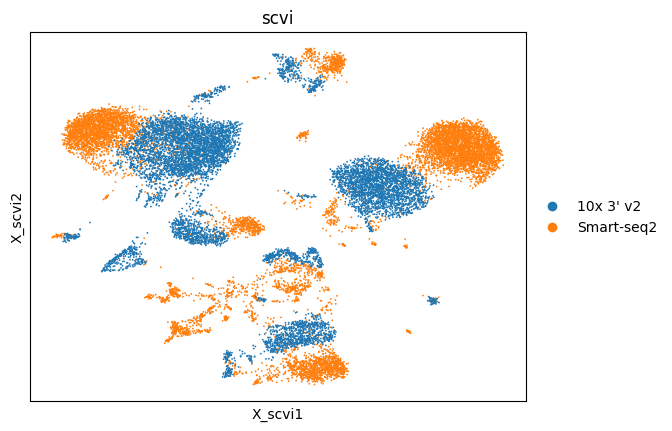

In [28]:
for emb in emb_names:
    scanpy.pl.embedding(adata, basis="X_" + emb, color="assay", title=emb)

### Mouse -- large

In [29]:
emb_names = list(emb_uris_mouse.keys()) + maintained_embs_mouse

In [30]:
adata = cellxgene_census.get_anndata(
    census,
    organism="mus_musculus",
    measurement_name="RNA",
    obs_value_filter="tissue_general == 'pancreas'",
    column_names={"obs": ["cell_type", "assay", "soma_joinid"]},
    obsm_layers=maintained_embs_mouse,
)

In [31]:
adata

AnnData object with n_obs × n_vars = 337562 × 52417
    obs: 'cell_type', 'assay', 'soma_joinid', 'tissue_general'
    var: 'soma_joinid', 'feature_id', 'feature_name', 'feature_length', 'nnz', 'n_measured_obs'
    obsm: 'scvi'

In [32]:
this_embs = emb_uris_mouse.copy()
for emb in this_embs:
    adata.obsm[emb] = get_embedding(
        census_version,
        emb_uris_mouse[emb],
        adata.obs["soma_joinid"].to_numpy(),
    )

In [33]:
for emb in emb_names:
    scanpy.pp.neighbors(adata, use_rep=emb, key_added=emb)
    scanpy.tl.umap(adata, neighbors_key=emb)
    adata.obsm["X_" + emb] = adata.obsm["X_umap"].copy()
    del adata.obsm["X_umap"]

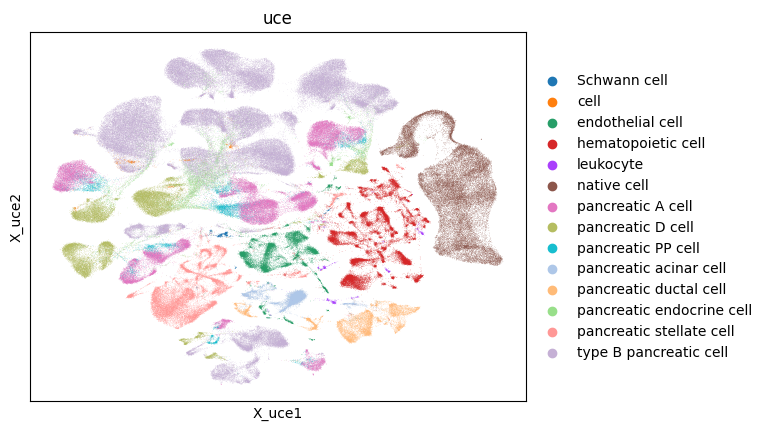

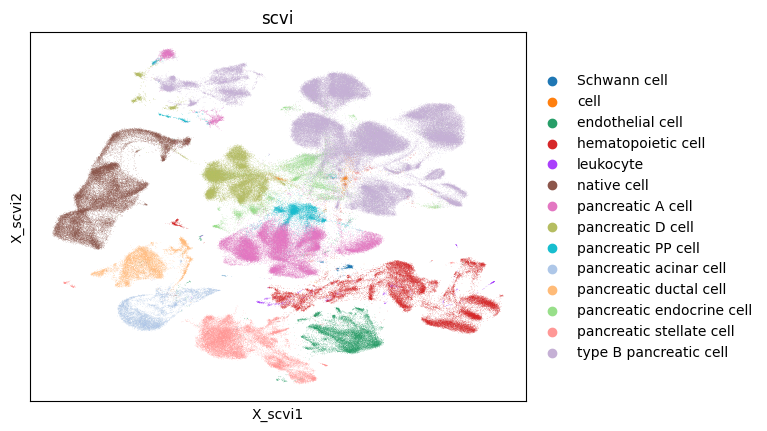

In [34]:
for emb in emb_names:
    scanpy.pl.embedding(adata, basis="X_" + emb, color="cell_type", title=emb)

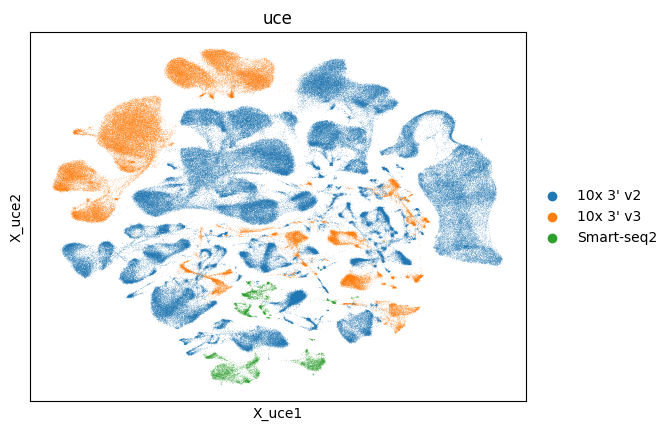

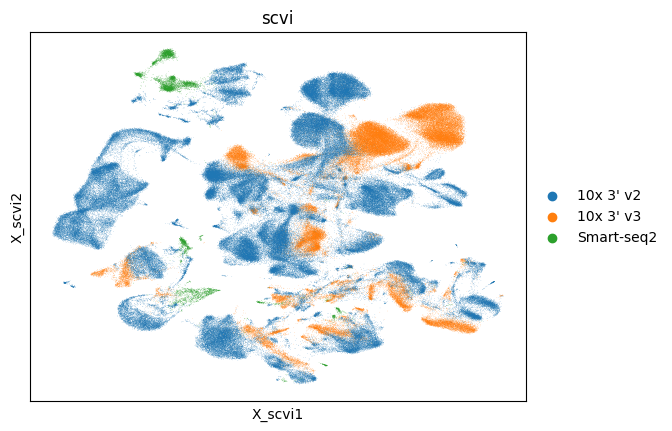

In [35]:
for emb in emb_names:
    scanpy.pl.embedding(adata, basis="X_" + emb, color="assay", title=emb)

### Appendix: get tissues by number of cells

In [36]:
obs_human = (
    census["census_data"]["homo_sapiens"]
    .obs.read(column_names=["tissue_general"], value_filter="is_primary_data == True")
    .concat()
    .to_pandas()
)
obs_human.value_counts()

tissue_general            is_primary_data
brain                     True               11896761
blood                     True                8753631
lung                      True                2907156
heart                     True                1776351
breast                    True                1330084
kidney                    True                1033424
small intestine           True                 919981
eye                       True                 799353
liver                     True                 555123
bone marrow               True                 452866
adrenal gland             True                 449892
lymph node                True                 407199
endocrine gland           True                 398252
colon                     True                 378264
placenta                  True                 373867
respiratory system        True                 368850
reproductive system       True                 364425
spleen                    True          

In [37]:
obs_mouse = (
    census["census_data"]["mus_musculus"]
    .obs.read(column_names=["tissue_general"], value_filter="is_primary_data == True")
    .concat()
    .to_pandas()
)
obs_mouse.value_counts()

tissue_general          is_primary_data
brain                   True               2990242
pancreas                True                311381
kidney                  True                179684
lung                    True                 97552
bone marrow             True                 90225
reproductive system     True                 88194
central nervous system  True                 65274
spleen                  True                 39552
prostate gland          True                 37715
musculature             True                 34580
urethra                 True                 24700
tongue                  True                 24415
adipose tissue          True                 19175
heart                   True                 18282
exocrine gland          True                 15577
skeletal system         True                 15127
endocrine gland         True                 13322
urinary bladder         True                 11377
respiratory system      True              

### Human - faulty dataset (duplicated Tabula Sapiens data)

In [38]:
emb_names = list(emb_uris_human.keys()) + maintained_embs_human
emb_names.remove("nmf")

In [39]:
datasets = [
    "97a17473-e2b1-4f31-a544-44a60773e2dd",  # Tabula sapiens subset epithelial
    "53d208b0-2cfd-4366-9866-c3c6114081bc",  # Tabula sapiens subset endothelial
    "ff45e623-7f5f-46e3-b47d-56be0341f66b",  # Tabula sapiens all
]
adata = cellxgene_census.get_anndata(
    census,
    organism="homo_sapiens",
    measurement_name="RNA",
    obs_value_filter=f"dataset_id in {datasets} and tissue_general == 'pancreas'",
    # obs_value_filter = "tissue_general == 'pancreas'",
    obsm_layers=maintained_embs_human,
)

In [40]:
adata

AnnData object with n_obs × n_vars = 35209 × 60664
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars'
    var: 'soma_joinid', 'feature_id', 'feature_name', 'feature_length', 'nnz', 'n_measured_obs'
    obsm: 'scvi', 'geneformer'

In [41]:
this_embs = emb_uris_human.copy()
this_embs.pop("nmf")
for emb in this_embs:
    adata.obsm[emb] = get_embedding(
        census_version,
        emb_uris_human[emb],
        adata.obs["soma_joinid"].to_numpy(),
    )

    # Exclude cells with all embeddings as NaN
    nan_row_sums = np.sum(np.isnan(adata.obsm[emb]), axis=1)
    include_rows = nan_row_sums != adata.obsm[emb].shape[1]
    adata = adata[include_rows,]

In [42]:
for emb in emb_names:
    scanpy.pp.neighbors(adata, use_rep=emb, key_added=emb)
    scanpy.tl.umap(adata, neighbors_key=emb)
    adata.obsm["X_" + emb] = adata.obsm["X_umap"].copy()
    del adata.obsm["X_umap"]

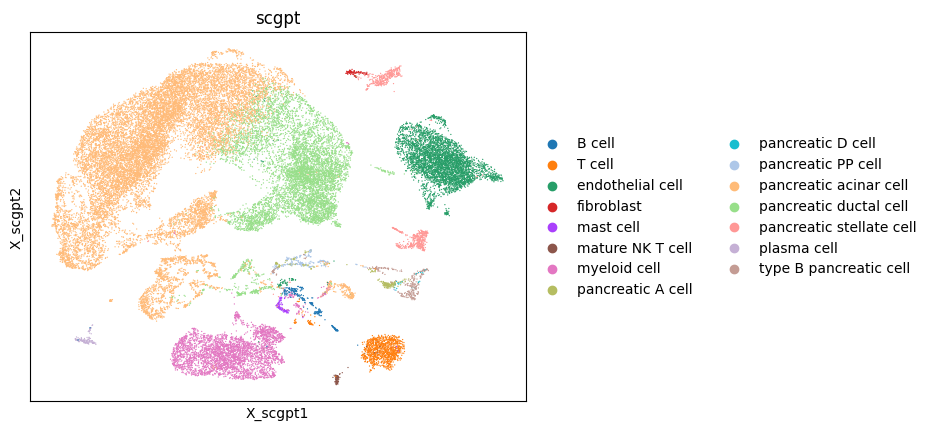

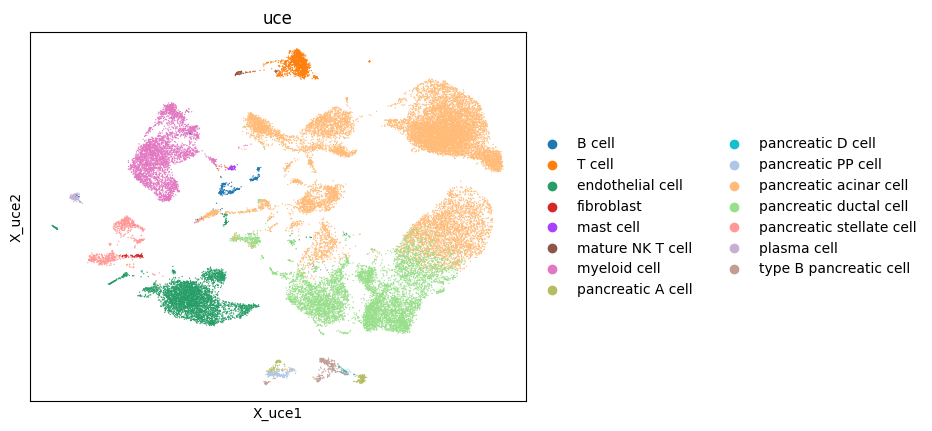

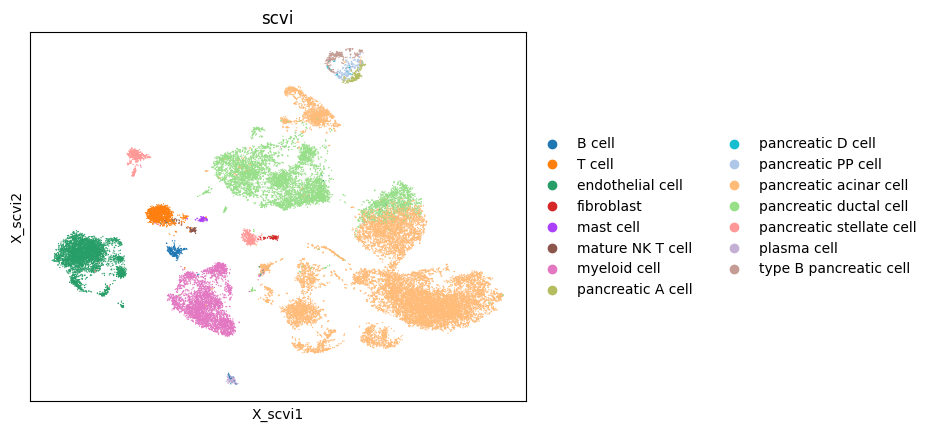

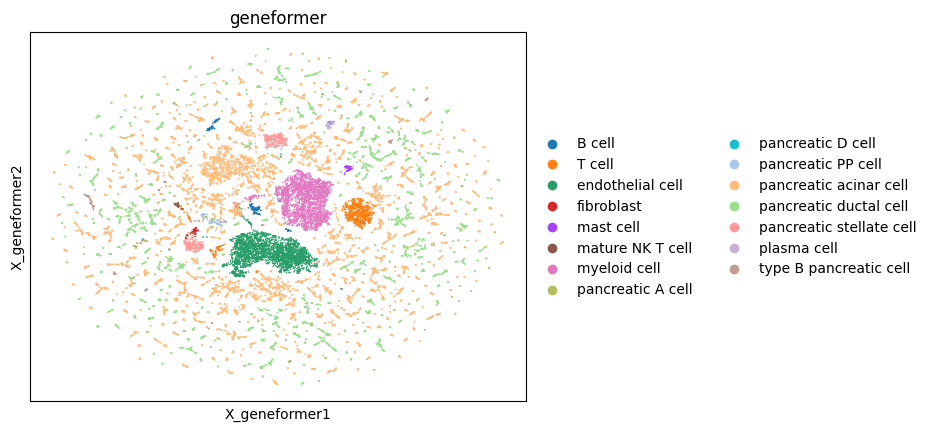

In [43]:
for emb in emb_names:
    scanpy.pl.embedding(adata, basis="X_" + emb, color="cell_type", title=emb)

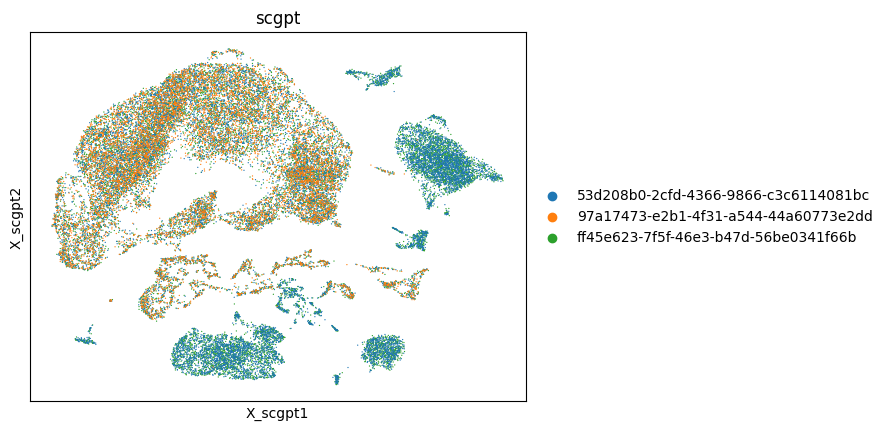

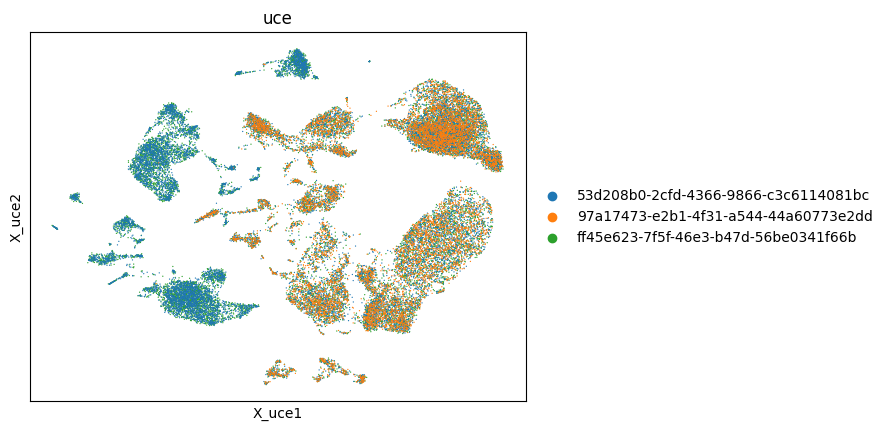

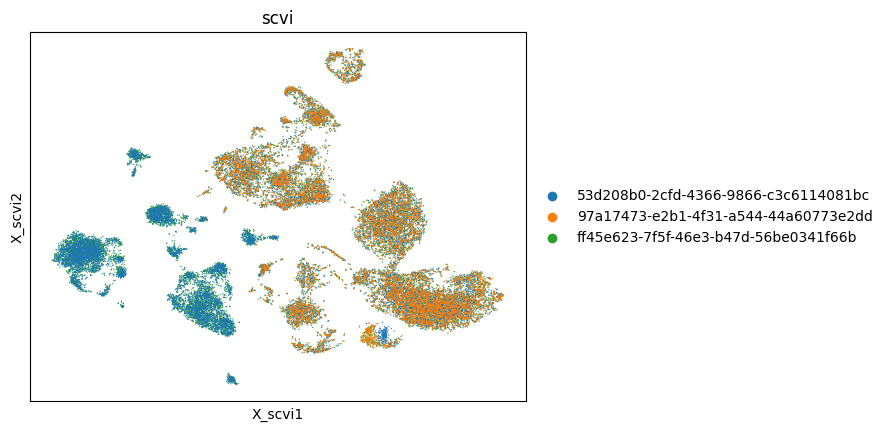

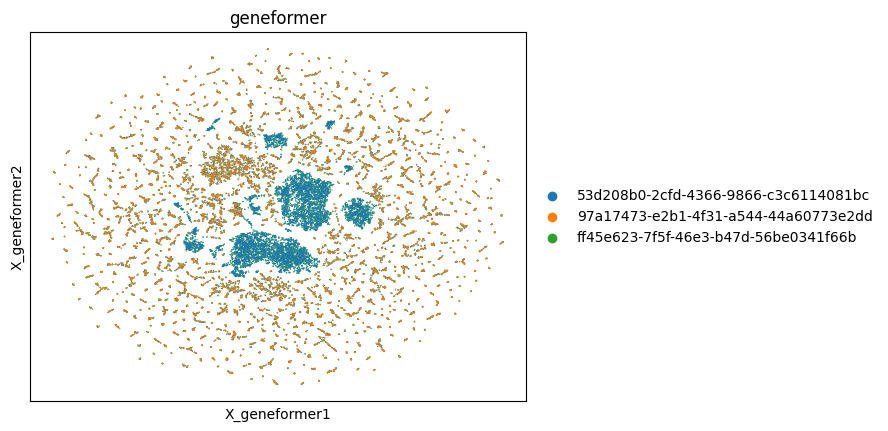

In [44]:
for emb in emb_names:
    scanpy.pl.embedding(adata, basis="X_" + emb, color="dataset_id", title=emb)

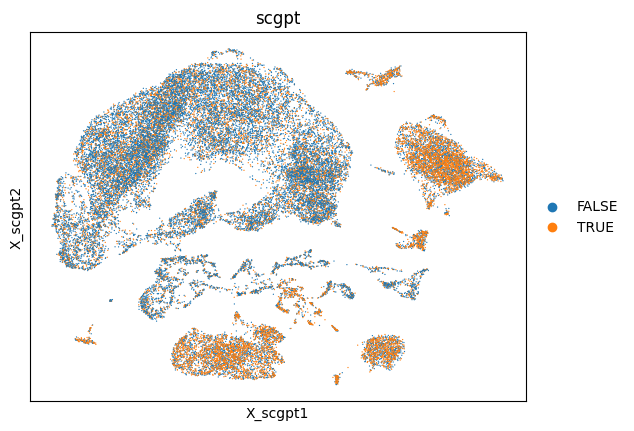

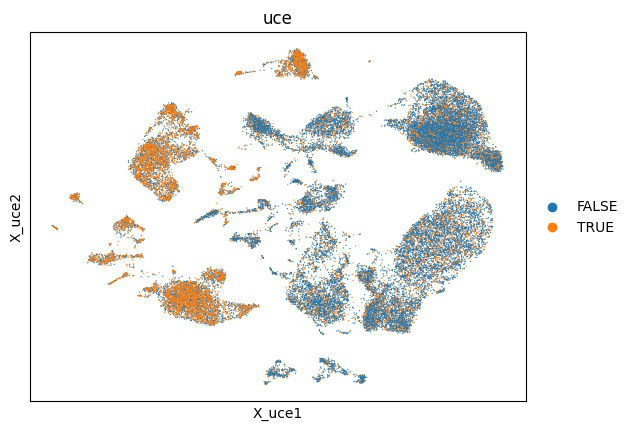

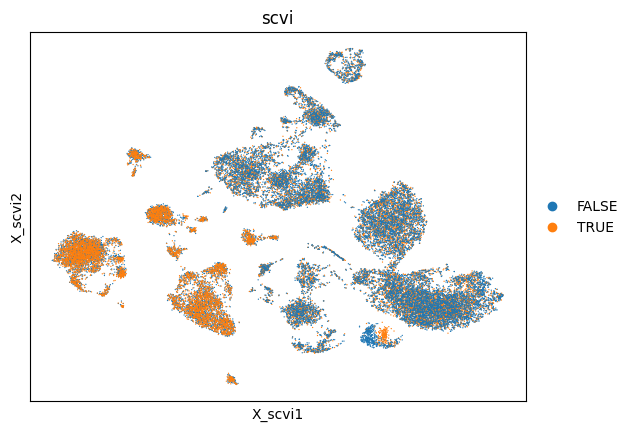

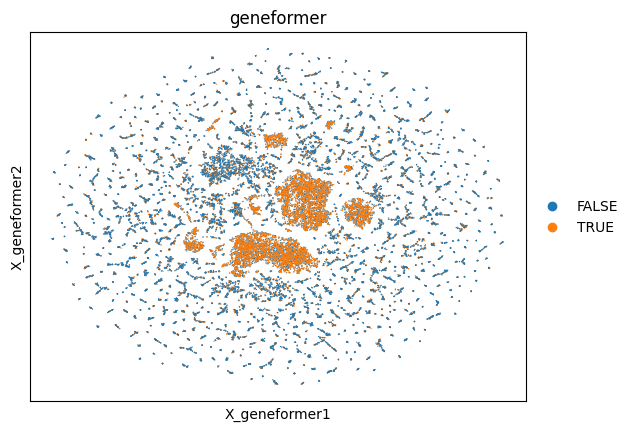

In [45]:
booleanDictionary = {True: "TRUE", False: "FALSE"}
adata.obs["primary"] = adata.obs["is_primary_data"].map(booleanDictionary)
for emb in emb_names:
    scanpy.pl.embedding(adata, basis="X_" + emb, color="primary", title=emb)

In [46]:
row_sums_scgpt = np.sum(adata.obsm["scgpt"], axis=1)
counter = collections.Counter(row_sums_scgpt)

In [47]:
row_sums_geneformer = np.sum(adata.obsm["geneformer"], axis=1)
counter = collections.Counter(row_sums_geneformer)

In [48]:
indices = np.where(row_sums_geneformer == -13.524811)
adata.obsm["geneformer"][indices]

array([[-0.07373047, -0.44921875,  0.36523438, ..., -1.        ,
        -0.546875  , -0.15917969],
       [-0.16796875, -1.2109375 ,  0.24316406, ..., -0.68359375,
        -0.69140625, -0.5       ],
       [-0.07373047, -0.44921875,  0.36523438, ..., -1.        ,
        -0.546875  , -0.15917969],
       [-0.16796875, -1.2109375 ,  0.24316406, ..., -0.68359375,
        -0.69140625, -0.5       ],
       [-0.07373047, -0.44921875,  0.36523438, ..., -1.        ,
        -0.546875  , -0.15917969],
       [-0.16796875, -1.2109375 ,  0.24316406, ..., -0.68359375,
        -0.69140625, -0.5       ]], dtype=float32)

In [49]:
repeated = indices[0][[1, 3, 5]]

In [50]:
adata.obsm["geneformer"][repeated, :4]

array([[-0.16796875, -1.2109375 ,  0.24316406, -1.171875  ],
       [-0.16796875, -1.2109375 ,  0.24316406, -1.171875  ],
       [-0.16796875, -1.2109375 ,  0.24316406, -1.171875  ]],
      dtype=float32)

In [51]:
adata.obsm["scvi"][repeated, :4]

array([[-0.0390625 ,  0.01586914,  1.0703125 , -1.8125    ],
       [-0.04101562, -0.00576782,  0.7734375 , -1.6171875 ],
       [-0.0390625 ,  0.01586914,  1.0625    , -1.8125    ]],
      dtype=float32)

In [52]:
adata.obsm["scgpt"][repeated, :4]

array([[-0.00254822, -0.00296021, -0.0201416 , -0.02355957],
       [-0.00102234, -0.00302124, -0.02880859, -0.03125   ],
       [-0.00118256, -0.00097656, -0.0201416 , -0.02246094]],
      dtype=float32)

In [53]:
adata.obsm["uce"][repeated, :4]

array([[-0.0038147 , -0.02600098,  0.01611328, -0.01965332],
       [-0.00378418, -0.02587891,  0.01452637, -0.01831055],
       [-0.00077057, -0.02697754,  0.01489258, -0.01409912]],
      dtype=float32)

In [54]:
np.sum(adata.X[repeated[0], :] == adata.X[repeated[2], :].toarray())

60664

In [55]:
adata[repeated,].obs

soma_joinid                            dataset_id      assay  \
12553      8280795  ff45e623-7f5f-46e3-b47d-56be0341f66b  10x 3' v3   
26050     52090233  53d208b0-2cfd-4366-9866-c3c6114081bc  10x 3' v3   
34498     52602486  97a17473-e2b1-4f31-a544-44a60773e2dd  10x 3' v3   

      assay_ontology_term_id               cell_type  \
12553            EFO:0009922  pancreatic acinar cell   
26050            EFO:0009922  pancreatic acinar cell   
34498            EFO:0009922  pancreatic acinar cell   

      cell_type_ontology_term_id        development_stage  \
12553                 CL:0002064  59-year-old human stage   
26050                 CL:0002064  59-year-old human stage   
34498                 CL:0002064  59-year-old human stage   

      development_stage_ontology_term_id disease disease_ontology_term_id  \
12553                     HsapDv:0000153  normal             PATO:0000461   
26050                     HsapDv:0000153  normal             PATO:0000461   
34498                     HsapDv:0000153  normal             PATO:0000461   

       ...             tissue  tissue_ontology_term_id tissue_general  \
12553  ...  exocrine pancreas           UBERON:0000017       pancreas   
26050  ...  exocrine pancreas           UBERON:0000017       pancreas   
34498  ...  exocrine pancreas           UBERON:0000017       pancreas   

      tissue_general_ontology_term_id  raw_sum   nnz raw_mean_nnz  \
12553                  UBERON:0001264  23997.0  2106    11.394587   
26050                  UBERON:0001264  23997.0  2106    11.394587   
34498                  UBERON:0001264  23997.0  2106    11.394587   

      raw_variance_nnz n_measured_vars primary  
12553      7687.567268           51688   FALSE  
26050      7687.567268           57042    TRUE  
34498      7687.567268           55934   FALSE  

[3 rows x 27 columns]